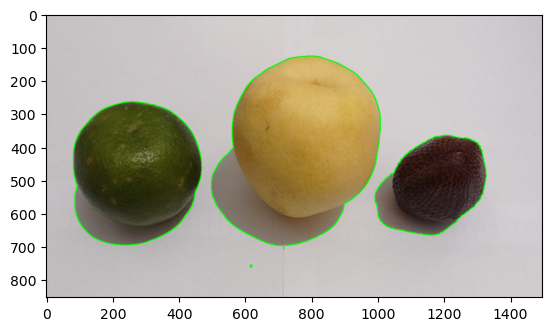

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread("buah.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)

# Find contours in the edge image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the original image
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# List to store the detected contours
detected_contours = []

# Loop over the contours and draw them on the image
for contour in contours:
    # Draw the contour on the image
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
    
    # Add the contour to the detected_contours list
    detected_contours.append(contour)

# Plot the image with detected contours
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Show the plot
plt.show()

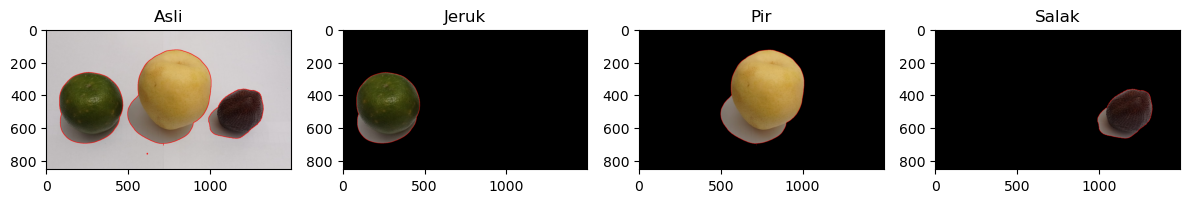

In [4]:
# Create a blank black image of the same size as the input image
black_image = np.zeros_like(image)

# Create a figure and axes using plt.subplot
fig, axs = plt.subplots(1, 4, figsize=(12, 8))

# Loop over the contours and draw them on the image
for contour in contours:
    # Draw the contour on the image
    cv2.drawContours(image, [contour], -1, (0, 0, 255), 2)
    
    # Add the contour to the detected_contours list
    detected_contours.append(contour)

# Plot the image with detected contours
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot the original image with contours
#axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.drawContours(image, contours, -1, (0, 0, 255), 2)
axs[0].set_title("Asli")

# Plot the object 1
object_image = np.zeros_like(image)
cv2.fillPoly(object_image, [contours[2]], (255, 255, 255))
object_result = cv2.bitwise_and(image, object_image)
axs[1].imshow(cv2.cvtColor(object_result, cv2.COLOR_BGR2RGB))
axs[1].set_title("Jeruk")

# Plot the object 2
object_image = np.zeros_like(image)
cv2.fillPoly(object_image, [contours[3]], (255, 255, 255))
object_result = cv2.bitwise_and(image, object_image)
axs[2].imshow(cv2.cvtColor(object_result, cv2.COLOR_BGR2RGB))
axs[2].set_title("Pir")

# Plot the object 3
object_image = np.zeros_like(image)
cv2.fillPoly(object_image, [contours[1]], (255, 255, 255))
object_result = cv2.bitwise_and(image, object_image)
axs[3].imshow(cv2.cvtColor(object_result, cv2.COLOR_BGR2RGB))
axs[3].set_title("Salak")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()